In [74]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [75]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
# Normalize pixel values to the range [0, 1]
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

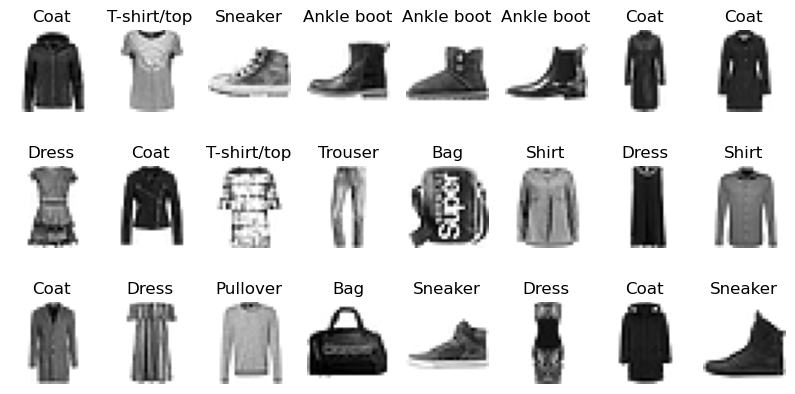

In [76]:
# Plot some sample images with labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 5))
for i in range(24):
    plt.subplot(3, 8, i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [77]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [78]:
# Define the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [80]:
# Train the model with a validation split
history = model.fit(X_train, y_train,  validation_split=0.2, 
                    epochs=20, 
                    batch_size=32)

Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.6582 - loss: 1.0755 - val_accuracy: 0.8121 - val_loss: 0.5449
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.8166 - loss: 0.5417 - val_accuracy: 0.8072 - val_loss: 0.5189
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.8352 - loss: 0.4696 - val_accuracy: 0.8323 - val_loss: 0.4727
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.8458 - loss: 0.4420 - val_accuracy: 0.8467 - val_loss: 0.4294
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.8548 - loss: 0.4122 - val_accuracy: 0.8530 - val_loss: 0.4171
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.8584 - loss: 0.4040 - val_accuracy: 0.8525 - val_loss: 0.4067
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.8631 - loss: 0.3840 - val_accuracy: 0.8616 - val_loss: 0.3970
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.8657 -

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

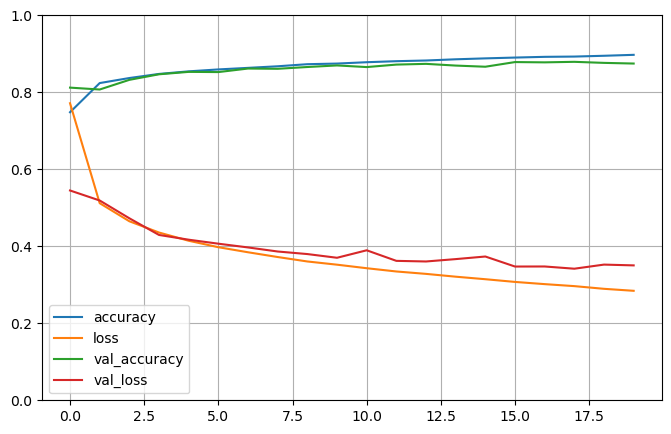

In [82]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [85]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

313/313 - 0s - 358us/step - accuracy: 0.8488 - loss: 59.2127
Test Loss: 59.2127, Test Accuracy: 0.8488


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


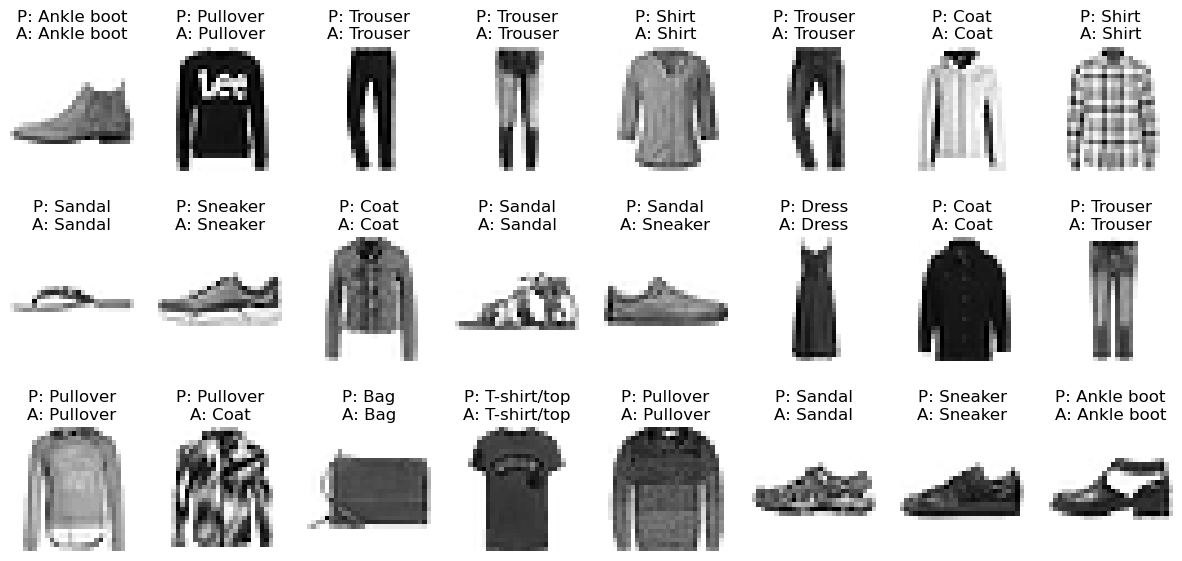

In [93]:
# Predict the class for some test images
predictions = model.predict(X_test)

# Plot the first 5 test predictions with actual labels
plt.figure(figsize=(15, 7))
for i in range(24):
    plt.subplot(3, 8, i + 1)
    plt.imshow(X_test[i], cmap='gray_r')
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(y_test[i])
    plt.title(f'P: {class_names[predicted_label]}\nA: {class_names[actual_label]}')
    plt.axis('off')
plt.show()